## Heart Disease Classifier
This files classifies whether or not a patient has heart disease based on his medical attributes

#### Problem Definition
> Given medical attributes of a person, predict if he has heart disease or not

#### Data
> The dataset references the UC Irivine ML repository.
https://archive.ics.uci.edu/dataset/45/heart+disease

#### Evaluation
> The objective is to attain a minimum accuracy of 95% and to validate the model via verifiable proof-of-work artifacts, including training logs, evaluation metrics, and reproducible code.

#### Features
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#tools
from sklearn.model_selection import train_test_split as tts, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

### Prepaing Test and Train data

In [30]:
np.random.seed(42)

df = pd.read_csv('./data/heart-disease.csv')

x = df.drop('target', axis = 1)
y = df.target

X_train, X_test, y_train, y_test = tts(x, y, test_size=0.2)

### Checking which model might give us best result

In [31]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

def fit_and_score(models: dict, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}

    for name , model in models.items():
        score = np.mean(cross_val_score(model, X=x, y=y))
        model_scores[name] = score
    return model_scores
    
model_scores = fit_and_score(models, X_train=X_train, X_test=X_test, y_test=y_test, y_train=y_train)


C:\Users\admin\Desktop\CODE\ML\sample_project_id_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\Desktop\CODE\ML\sample_project_id_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://sciki

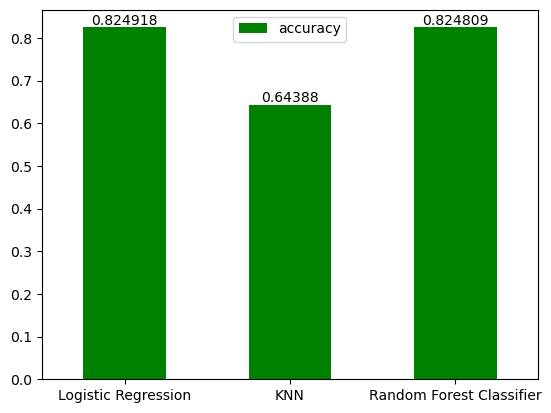

In [32]:
models_df = pd.DataFrame(data = model_scores.values(), index = model_scores.keys(), columns = ['accuracy'])
ax = models_df.plot(kind = 'bar', color = ['green'], rot=False)
for container in ax.containers:
    ax.bar_label(container=container,label_type='edge')

### Tuning hyperparameters 
For
* Logistic Regression
* Random Forest Classifier 

Using RandomizedSearchCV 

In [ ]:
log_params = {
    'C':np.logspace(-4,4, 20),
    'solver':['liblinear']
}

rand_params = {
    "n_estimators": [100, 200, 300],   
    "max_depth": [None, 10, 20, 30],   
    "min_samples_split": [2, 5, 10],   
    "min_samples_leaf": [1, 2, 4],     
    "max_features": ["sqrt", "log2"],  
    "bootstrap": [True, False] 
}

log_cv = RandomizedSearchCV(LogisticRegression(max_iter=500), param_distributions=log_params, cv = 5, n_iter=200, verbose=True)
rand_cv = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rand_params, n_iter=20, verbose=True, cv = 5)

log_cv.fit(X_train, y_train)
rand_cv.fit(X_train, y_train)




C:\Users\admin\Desktop\CODE\ML\sample_project_id_1\env\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 20 is smaller than n_iter=200. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


(0.859504132231405, 0.9380165289256198)

In [56]:
log_cv.best_params_, rand_cv.best_params_

({'solver': 'liblinear', 'C': np.float64(0.23357214690901212)},
 {'n_estimators': 200,
  'min_samples_split': 5,
  'min_samples_leaf': 4,
  'max_features': 'log2',
  'max_depth': 20,
  'bootstrap': True})

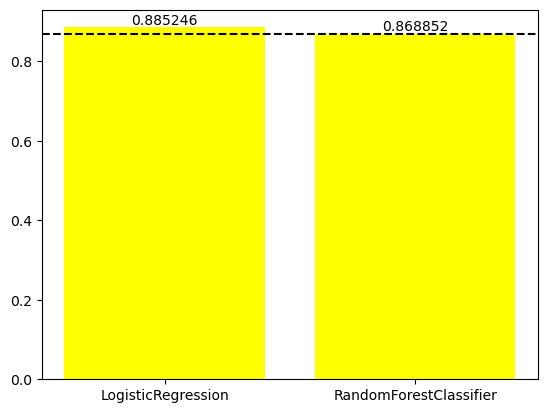

In [62]:
fig, ax = plt.subplots()

ax.bar(x=['LogisticRegression', 'RandomForestClassifier'], height=[log_cv.score(X_test, y_test), rand_cv.score(X_test, y_test)], color = 'yellow')
for container in ax.containers:
    ax.bar_label(container=container, label_type='edge')
ax.axhline(rand_cv.score(X_test, y_test), linestyle = '--', color = 'black')

>Based on results of the hyperparameters tuning we have selected Logistic Regression as the final model. 